In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer 
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [3]:
class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

In [4]:
dataset = pd.read_csv('cleveland.csv', sep = ',', names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])

In [5]:
dataset.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2
9,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


In [6]:
from sklearn.preprocessing import LabelBinarizer


processed_dataset = dataset.replace({'num': [2,3,4]},1)

In [7]:
processed_dataset.head(15)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,1
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,1
9,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


In [8]:
plt.figure(figsize=(12,10))
cor = processed_dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
#Correlation with output variable

NameError: name 'sns' is not defined

<Figure size 864x720 with 0 Axes>

In [9]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = processed_dataset.corr()
# sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
#Correlation with output variable
cor_target = abs(cor["num"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.4]
print(f"These Are The Relevant Features according to SU Algorithm's \n{relevant_features}")
# relevant_features
# sns.countplot(x="num",data=processed_dataset,palette="bwr")
# plt.show()

These Are The Relevant Features according to SU Algorithm's 
cp         0.414446
thalach    0.417167
exang      0.431894
oldpeak    0.424510
ca         0.460442
thal       0.525689
num        1.000000
Name: num, dtype: float64


<Figure size 864x720 with 0 Axes>

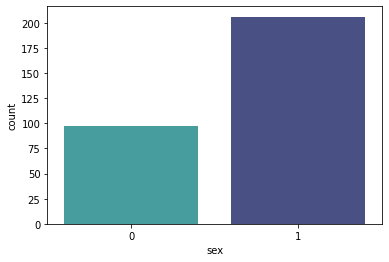

In [10]:
sns.countplot(x='sex', data=processed_dataset, palette="mako_r")

In [11]:
print(f"Dataset Sebelum di preproses :{dataset.isnull().sum()}")
print(dataset)
print("\n\n")
print(f"Dataset Setelah di preproses :{processed_dataset.isnull().sum()}")
print(processed_dataset)
# processed_dataset.num.value_counts()

Dataset Sebelum di preproses :age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
3

In [12]:
#Dataset dengan Mengganti Mean
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
idf=pd.DataFrame(imputer.fit_transform(processed_dataset))
idf.columns=processed_dataset.columns
idf.index=processed_dataset.index

dataset_mean_impute_X = idf.drop('num',axis=1)
dataset_mean_impute_y = idf['num']

print(idf)
#Menghapus null values NA
processed_dataset.dropna(subset = ["ca"], inplace=True)
processed_dataset.dropna(subset = ["thal"], inplace=True)
dataset_dropped_nullX = processed_dataset.drop('num',axis=1)
dataset_dropped_nullY = processed_dataset['num']


      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   
302  38.0  1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope        ca  thal  num  
0      3.0  0.000

In [13]:
#Initialize ChiSquare Class Mean dataset
cTMean = ChiSquare(idf)

#Feature Selection
testColumns = [ 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal',]
for var in testColumns:
    cTMean.TestIndependence(colX=var,colY="num" )

x_chi_mean = dataset_mean_impute_X.drop(['age','trestbps','chol','fbs'],axis=1)
y_chi_mean = dataset_mean_impute_y
x_chi_drop = dataset_dropped_nullX.drop(['age','trestbps','chol','fbs'],axis=1)
y_chi_drop = dataset_dropped_nullY



age is NOT an important predictor. (Discard age from model)
sex is IMPORTANT for Prediction
cp is IMPORTANT for Prediction
trestbps is NOT an important predictor. (Discard trestbps from model)
chol is NOT an important predictor. (Discard chol from model)
fbs is NOT an important predictor. (Discard fbs from model)
restecg is IMPORTANT for Prediction
thalach is NOT an important predictor. (Discard thalach from model)
exang is IMPORTANT for Prediction
oldpeak is IMPORTANT for Prediction
slope is IMPORTANT for Prediction
ca is IMPORTANT for Prediction
thal is IMPORTANT for Prediction


In [14]:
# PEARSON
# cp         0.414446
# thalach    0.417167
# exang      0.431894
# oldpeak    0.424510
# ca         0.460442
# thal       0.525689
# num
# NOT NEEDED : 
# - age
# - sex
# - trestbps
# - chol
# - fbs
# - restecg
# - slope
x_pearson_mean = dataset_mean_impute_X.drop(['age','sex','restecg','slope','trestbps','chol','fbs'],axis=1)
y_pearson_mean = dataset_mean_impute_y
x_pearson_drop = dataset_dropped_nullX.drop(['age','sex','restecg','slope','trestbps','chol','fbs'],axis=1)
y_pearson_drop = dataset_dropped_nullY

x_pearson_mean.head(10)

,cp,thalach,exang,oldpeak,ca,thal
0,1.0,150.0,0.0,2.3,0.0,6.0
1,4.0,108.0,1.0,1.5,3.0,3.0
2,4.0,129.0,1.0,2.6,2.0,7.0
3,3.0,187.0,0.0,3.5,0.0,3.0
4,2.0,172.0,0.0,1.4,0.0,3.0
5,2.0,178.0,0.0,0.8,0.0,3.0
6,4.0,160.0,0.0,3.6,2.0,3.0
7,4.0,163.0,1.0,0.6,0.0,3.0
8,4.0,147.0,0.0,1.4,1.0,7.0
9,4.0,155.0,1.0,3.1,0.0,7.0


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
test_data_size = 0.3
#Model 0:
# - UnProcessed data
X = processed_dataset.drop('num',axis=1)
Y = processed_dataset['num']

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size= test_data_size, random_state=0)
X_train = sc_x.fit_transform(X_train)
X_test  = sc_x.transform(X_test)

# Model 1 :
# - Changed Missing Values with mean
# - find features with Chi Squared 
# - Standard Scaler
X_mean_Train, X_mean_Test, y_mean_Train, y_meanTest = train_test_split(x_chi_mean, y_chi_mean, test_size=test_data_size, random_state=0)
X_mean_Train = sc_x.fit_transform(X_mean_Train)
X_mean_Test = sc_x.transform(X_mean_Test)


# Model 2: 
# - Dropped Missing values
# - find features with Chi Squared 
# - Standard Scaler
Xdrop_train_chi, Xdrop_test_chi,ydrop_train_chi,ydrop_test_chi = train_test_split(x_chi_drop,y_chi_drop,test_size=test_data_size, random_state =0)
Xdrop_train_chi.head(10)
Xdrop_train_chi = sc_x.fit_transform(Xdrop_train_chi)
Xdrop_test_chi = sc_x.transform(Xdrop_test_chi)

# Model 3: 
# - Dropped Missing values
# - find features with Pearson's Squared 
# - Standard Scaler
Xdrop_train_pearson, Xdrop_test_pearson,ydrop_train_pearson,ydrop_test_pearson = train_test_split(x_pearson_drop,y_pearson_drop,test_size=test_data_size, random_state =0)

Xdrop_train_pearson = sc_x.fit_transform(Xdrop_train_pearson)
Xdrop_test_pearson = sc_x.transform(Xdrop_test_pearson)
print(Xdrop_train_chi)

Xmean_train_pearson, Xmean_test_pearson,ymean_train_pearson,ymean_test_pearson = train_test_split(x_pearson_mean,y_pearson_mean,test_size=test_data_size, random_state =0)

Xmean_train_pearson = sc_x.fit_transform(Xmean_train_pearson)
Xmean_test_pearson = sc_x.transform(Xmean_test_pearson)


[[ 0.67656964 -0.18736639 -0.97144626 ...  0.64733704  0.3212196
   1.09010598]
 [ 0.67656964  0.86087261  1.03944749 ...  0.64733704  0.3212196
   0.57958123]
 [ 0.67656964  0.86087261 -0.97144626 ... -0.98679427  0.3212196
   1.09010598]
 ...
 [ 0.67656964  0.86087261  1.03944749 ... -0.98679427  2.43209125
   1.09010598]
 [ 0.67656964  0.86087261  1.03944749 ...  0.64733704 -0.73421623
   1.09010598]
 [ 0.67656964  0.86087261  1.03944749 ...  0.64733704  1.37665542
   0.57958123]]


In [16]:
from sklearn.neighbors import KNeighborsClassifier
num_neighbors = 9
clf = KNeighborsClassifier(n_neighbors=num_neighbors, p=2, metric='minkowski')
clf.fit(X_train,y_train)
yPred = clf.predict(X_test)
mse = mean_squared_error(y_test,yPred)
accuracy = accuracy_score(y_test,yPred)
print("Accuracy = ", accuracy)


Accuracy =  0.8333333333333334


In [17]:

clf_chi_mean = KNeighborsClassifier(n_neighbors=num_neighbors, p=2, metric='minkowski')
clf_chi_mean.fit(X_mean_Train,y_mean_Train)
yPred_chi = clf_chi_mean.predict(X_mean_Test)
accuracy_chi_mean = accuracy_score(y_meanTest,yPred_chi)
print(accuracy_chi_mean)

0.8241758241758241


In [18]:
clf_chi_drop = KNeighborsClassifier(n_neighbors=num_neighbors, p=2, metric='minkowski')
clf_chi_drop.fit(Xdrop_train_chi,ydrop_train_chi)
yPred__dropchi = clf_chi_drop.predict(Xdrop_test_chi)
accuracy_chi_drop = accuracy_score(ydrop_test_chi,yPred__dropchi)
print(accuracy_chi_drop)

0.8222222222222222


In [19]:
clf_pearson_drop = KNeighborsClassifier(n_neighbors=num_neighbors, p=2, metric='minkowski')
clf_pearson_drop.fit(Xdrop_train_pearson,ydrop_train_pearson)
yPred__droppearson = clf_pearson_drop.predict(Xdrop_test_pearson)
accuracy_chi_drop = accuracy_score(ydrop_test_pearson,yPred__droppearson)
print(accuracy_chi_drop)

0.7888888888888889


In [20]:
clf_pearson_mean = KNeighborsClassifier(n_neighbors=num_neighbors, p=2, metric='minkowski')
clf_pearson_mean.fit(Xmean_train_pearson,ymean_train_pearson)
yPred__meanpearson = clf_pearson_mean.predict(Xmean_test_pearson)
accuracy_chi_mean = accuracy_score(ymean_test_pearson,yPred__meanpearson)
print(accuracy_chi_mean)

0.8021978021978022


In [21]:
datatest = pd.read_csv('test.csv')

In [22]:
datatest.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [23]:
#Datatest full attribut:
datatest_X = datatest.drop('num',axis=1)
datatest_y = datatest['num']

#Datatest chi:
datatest_chi_X = datatest.drop(['age','trestbps','chol','fbs','num'],axis=1)
datatest_chi_y = datatest_y

#Datatest pearson:
datatest_pearson_X = datatest.drop(['age','sex','restecg','slope','trestbps','chol','fbs','num'],axis=1)
datatest_pearson_y = datatest_y
'age','sex','restecg','slope','trestbps','chol','fbs'
datatest_pearson_X.head(10)

,cp,thalach,exang,oldpeak,ca,thal
0,0,168,0,1.0,2,3
1,0,155,1,3.1,0,3
2,0,125,1,2.6,0,3
3,0,161,0,0.0,1,3
4,0,106,0,1.9,3,2
5,0,122,0,1.0,0,2
6,0,140,0,4.4,3,1
7,0,145,1,0.8,1,3
8,0,144,0,0.8,0,3
9,0,116,1,3.2,2,2


In [26]:
yPred = clf.predict(datatest_X)
accuracy_chi = accuracy_score(yPred,datatest_y)

print(accuracy_chi)

0.38341463414634147


In [25]:
# print(datatest_pearson_X.shape)
# print(Xdrop_train_pearson)
y_pearson_drop_pred = clf_pearson_drop.predict(datatest_pearson_X)
accuracy_pearson_drop = accuracy_score(y_pearson_drop_pred,datatest_pearson_y)
print(accuracy_pearson_drop)

0.4868292682926829


In [25]:
y_pearson_mean_pred = clf_pearson_mean.predict(datatest_pearson_X)
accuracy_pearson_mean = accuracy_score(y_pearson_mean_pred,datatest_pearson_y)
print(accuracy_pearson_mean)

0.4868292682926829
